In [1]:
cd ~/desktop/kaggle_data/

/Users/Bruce/Desktop/kaggle_data


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
Data = pd.read_csv("train.csv",header=False,parse_dates=['Dates'])
#testData =  pd.read_csv("test.csv",header=False,parse_dates=['Dates'])
y = Data['Category']
del Data['Category']
x = Data

In [47]:
from sklearn.cross_validation import train_test_split

In [67]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(
      x, y, test_size=0.2, random_state=42)

##  feature engineering

In [62]:
def feature_engineering_train_X(data):
    data['Day'] = data['Dates'].dt.day
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['Hour'] = data['Dates'].dt.hour
    data['Minute'] = data['Dates'].dt.minute
    data['DayOfWeek'] = data['Dates'].dt.dayofweek
    data['WeekOfYear'] = data['Dates'].dt.weekofyear
    enc = LabelEncoder()
    data['PdDistrict_number'] = enc.fit_transform(data['PdDistrict']) # transform district name to numbers

    #del data['Descript']
    #del data['Resolution']
    data = data.drop(['Descript', 'Resolution'], axis = 1)

    return data

In [58]:
def feature_engineering_train_Y(y):
    enc_cat = LabelEncoder()
    enc_cat.fit(y)
    Train_Y = enc_cat.transform(y)
    
    return Train_Y
    

In [ ]:
def feature_engineering_test(data):
    data['Day'] = data['Dates'].dt.day
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['Hour'] = data['Dates'].dt.hour
    data['Minute'] = data['Dates'].dt.minute
    data['DayOfWeek'] = data['Dates'].dt.dayofweek
    data['WeekOfYear'] = data['Dates'].dt.weekofyear
    enc = LabelEncoder()
    data['PdDistrict_number'] = enc.fit_transform(data['PdDistrict']) # transform district name to numbers
    del data['Id']
    
    return data
    

In [69]:
Train_X= feature_engineering_train_X(Train_X)
Test_X = feature_engineering_train_X(Test_X)
Train_Y = feature_engineering_train_Y(Train_Y)
Test_Y =  feature_engineering_train_Y(Train_Y)

## Not processing yet:
 - address
 - x&y coordinates
 - may define some new distance
 - may add some new features 


## Data cleaning

In [75]:
Train_X.columns[0:].values

array(['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y', 'Day',
       'Month', 'Year', 'Hour', 'Minute', 'WeekOfYear', 'PdDistrict_number'], dtype=object)

## training columns 

In [10]:
#train_col_name = ['DayOfWeek',     # not including address
 #        'X', 'Y', 'Day', 'Month', 'Year', 'Hour',
#     'Minute', 'WeekOfYear', 'PdDistrict_number']


In [76]:
train_col_name = ['X','Y']

## test columns

In [11]:
#test_col_name = ['DayOfWeek',     # not including address
#         'X', 'Y', 'Day', 'Month', 'Year', 'Hour',
#       'Minute', 'WeekOfYear', 'PdDistrict_number']

In [77]:
test_col_name = ['X','Y']

## Naive Bayes

## Knn

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

In [78]:
X = Train_X[train_col_name]
Y = Train_Y
X_test = Train_X[train_col_name]
Y_test = Train_Y

In [93]:
#CV = KFold(n=len(X), n_folds=5, indices=True)   # five folds cross-validation

## cross validation

## METHOD 1

In [20]:
#knn = KNeighborsClassifier()
#k_range = range(1, 11)
#param_grid = dict(n_neighbors=k_range)
#grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
#grid.fit(X, Y)

In [94]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X,Y)
y_red = knn.predict(X_test)

In [97]:
from sklearn import metrics
los = metrics.log_loss(Y_test, y_red)

ValueError: y_true and y_pred have different number of classes 39, 2

In [103]:
y_red

array([21, 19,  1, ..., 16,  7, 20])

In [101]:
Y_test

array([20, 20, 36, ..., 16, 21, 16])

In [104]:
#score1 = cross_val_score(knn, X, Y, cv = 5, scoring='log_loss')

In [ ]:
metrics.log_loss(actual, predicted)


In [92]:
np.sum(score1)

-38.985067960040759

knn = KNeighborsClassifier(n_neighbors=10)
X = np.mean(cross_val_score(knn, X, Y, cv=5, scoring='accuracy'))

In [42]:
# search for an optimal value of K
k_range = range(1, 5)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, Y, cv=5, scoring='log_loss')))

In [ ]:
k_range = range(1, 15)

In [43]:
scores

[0.1612369365714526,
 0.17545140324302877,
 0.18463980178313513,
 0.19546486046871775,
 0.20800170926406189,
 0.21541922215960035,
 0.22192921183153747,
 0.22523195132051166,
 0.2298798090967254,
 0.23292858278224285,
 0.23575303493471073,
 0.23828143886385034,
 0.24048974126450456,
 0.24075625811082685]

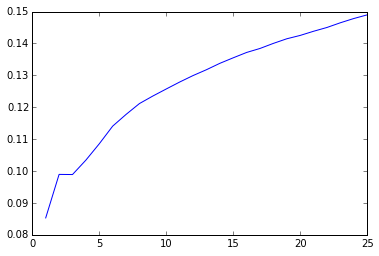

In [29]:
k_range = range(1,26)   ## not a good option
plt.figure()
plt.plot(k_range, scores)

## RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier

## tuning number of trees

In [36]:
tree_number = range(10,30)
score_tree = []
for tree in tree_number:
    random_forest_clf = RandomForestClassifier(n_estimators = tree,max_features = None ,max_depth = 4)
    #random_forest_clf.fit(X,Y)
    score_tree.append(np.mean(cross_val_score(random_forest_clf, X, Y, cv=5, scoring='accuracy',n_jobs = 3)))
    

In [37]:
score_tree

[0.1931774027557453,
 0.1936090756016815,
 0.19361135333738444,
 0.19366260215070957,
 0.19359426932734128,
 0.1935783244964519,
 0.1937332245009544,
 0.193683112000192,
 0.19368766754293712,
 0.19367627830667422,
 0.19368197265890191,
 0.19364324923225901,
 0.19358516420904548,
 0.19358288647334254,
 0.19365463882522518,
 0.19364894419412337,
 0.19357719155687667,
 0.19368538948296155,
 0.19368311179265715,
 0.19371158478602982]

In [33]:
scores

[0.085294714885062142,
 0.098942996002546635,
 0.098896360617554413,
 0.10341655325826041,
 0.10853816910715394,
 0.11407544715498878,
 0.11775178262843977,
 0.12116047172476292,
 0.12352024248860578,
 0.12572854167487474,
 0.12790267957867821,
 0.12993560366108584,
 0.13176693902090234,
 0.13376909600491715,
 0.13550363399812004,
 0.13718350017994657,
 0.13843741821397698,
 0.14002960122649194,
 0.14147372130912733,
 0.1425260579423421,
 0.14383123564616812,
 0.14501910289256337,
 0.1464939822767716,
 0.14782193847918604,
 0.14896993835248035,
 0.1880952591336999,
 0.20401362548190685,
 0.20609071727102343,
 0.19161806481609839,
 0.1915230590398867,
 0.17497602192727463,
 0.15878269252424695,
 0.16496863605809498,
 0.15015470012342344]

## Multi-class AdaBoosted Decision Trees

## Xgdboosting